(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'Team 1 – Ball-Heatmap'}, xlabel='Länge (m)', ylabel='Breite (m)'>,
        <Axes: title={'center': 'Team 2 – Ball-Heatmap'}, xlabel='Länge (m)'>],
       dtype=object))

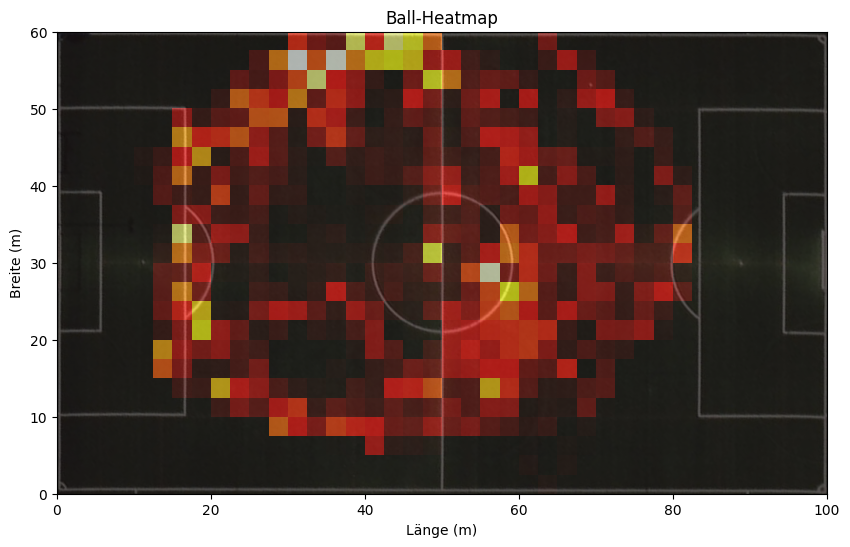

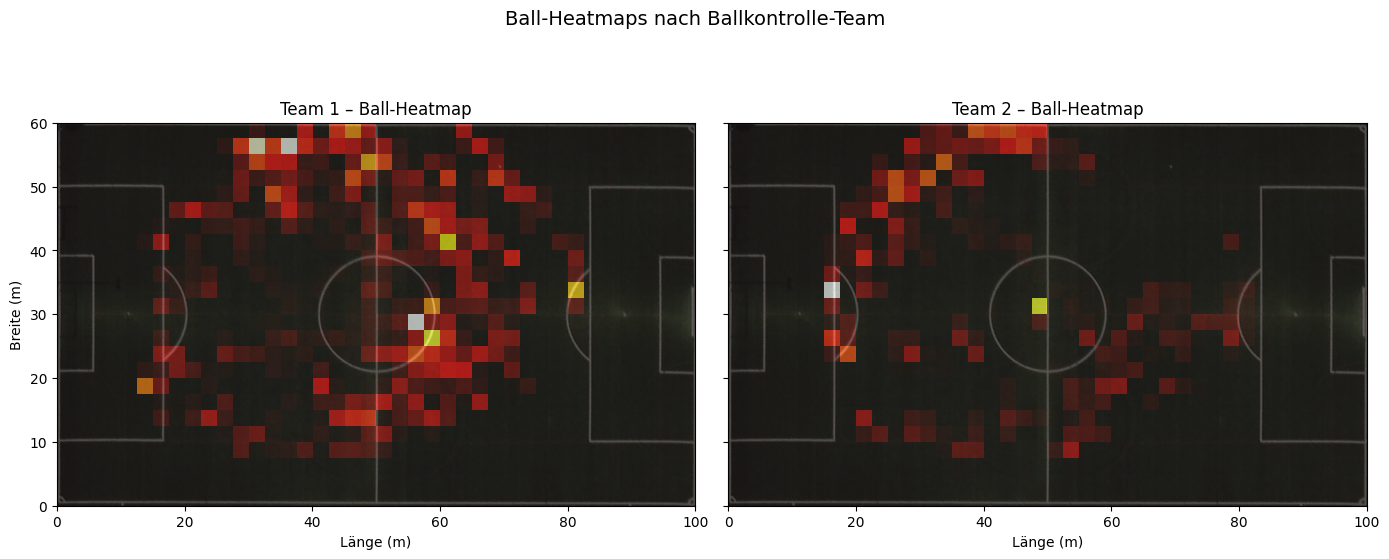

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from config import Settings

from analytics.data_loading import load_frame_events
from analytics.heatmaps import (
    plot_ball_heatmap_on_pitch,
    plot_team_ball_heatmaps_on_pitch,
)
from analytics.zones import plot_zone_summary
from analytics.possession import plot_rolling_possession

s = Settings()

# Projekt-Root automatisch finden
PROJECT_ROOT = next(p for p in Path.cwd().parents if (p / "project/Computer-Vision-FCH").exists())

# CSV laden
csv = PROJECT_ROOT / s.paths.frame_events_csv
df = pd.read_csv(csv)

# Pitch-Bild laden
pitch_path = PROJECT_ROOT / s.paths.pitch_image
pitch_img = Image.open(pitch_path)

pitch_length = s.analytics.pitch_length   # Meter
pitch_width = s.analytics.pitch_width

plot_ball_heatmap_on_pitch(df, pitch_img, pitch_length, pitch_width)
plot_team_ball_heatmaps_on_pitch(df, pitch_img, pitch_length, pitch_width)
plot_zone_summary(df, pitch_img, pitch_length, pitch_width)
plot_rolling_possession(df, window_sec=10.0)